In [1]:
import pandas as pd
import umap
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.cluster import DBSCAN
import hdbscan

%matplotlib inline

In [2]:
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder

In [3]:
final_df = pd.read_csv("../data/processed/final_df.csv")

In [4]:
num_df = pd.DataFrame(data=final_df, columns=["n_assignments", "mean_score", "total_clicks", "studied_credits",])

cat_df = pd.DataFrame(data=final_df, columns=["age_band", "gender", "highest_education", "final_result", "region"])

In [5]:
#No primary key 

In [6]:
cat_df

,age_band,gender,highest_education,final_result,region
0,55<=,M,HE Qualification,Pass,East Anglian Region
1,35-55,F,HE Qualification,Pass,Scotland
2,35-55,F,A Level or Equivalent,Pass,South East Region
3,0-35,F,Lower Than A Level,Pass,West Midlands Region
4,35-55,M,A Level or Equivalent,Pass,Wales
...,...,...,...,...,...
26716,0-35,F,A Level or Equivalent,Distinction,Scotland
26717,35-55,F,Lower Than A Level,Distinction,East Anglian Region
26718,0-35,F,A Level or Equivalent,Pass,South Region
26719,35-55,F,Lower Than A Level,Withdrawn,South East Region


In [7]:
cat_df.final_result.unique()

array(['Pass', 'Withdrawn', 'Fail', 'Distinction'], dtype=object)

In [8]:
#make a dictionary key:final_result, value:ordinal number

### Treat cat variable to numeric:
#### final_result => order 0-3

In [9]:
cat_df['final_result'] = cat_df['final_result'].apply(lambda x: str(x).replace('Distinction','3'))
cat_df['final_result'] = cat_df['final_result'].apply(lambda x: str(x).replace('Pass','2'))
cat_df['final_result'] = cat_df['final_result'].apply(lambda x: str(x).replace('Fail','1'))
cat_df['final_result'] = cat_df['final_result'].apply(lambda x: str(x).replace('Withdrawn','0'))

In [10]:
cat_df.final_result.unique()

array(['2', '0', '1', '3'], dtype=object)

#### highest_education => order 0-4

In [11]:
cat_df.highest_education.unique()

array(['HE Qualification', 'A Level or Equivalent', 'Lower Than A Level',
       'Post Graduate Qualification', 'No Formal quals'], dtype=object)

In [12]:
cat_df['highest_education'] = cat_df['highest_education'].apply(lambda x: str(x).replace('Post Graduate Qualification','4'))
cat_df['highest_education'] = cat_df['highest_education'].apply(lambda x: str(x).replace('HE Qualification','3'))
cat_df['highest_education'] = cat_df['highest_education'].apply(lambda x: str(x).replace('A Level or Equivalent','2'))
cat_df['highest_education'] = cat_df['highest_education'].apply(lambda x: str(x).replace('Lower Than A Level','1'))
cat_df['highest_education'] = cat_df['highest_education'].apply(lambda x: str(x).replace('No Formal quals','0'))

In [13]:
cat_df.highest_education.unique()

array(['3', '2', '1', '4', '0'], dtype=object)

#### age_band => order 1-3

In [14]:
cat_df.age_band.unique()

array(['55<=', '35-55', '0-35'], dtype=object)

In [15]:
cat_df['age_band'] = cat_df['age_band'].apply(lambda x: str(x).replace('55<=','3'))
cat_df['age_band'] = cat_df['age_band'].apply(lambda x: str(x).replace('35-55','2'))
cat_df['age_band'] = cat_df['age_band'].apply(lambda x: str(x).replace('0-35','1'))

In [16]:
cat_df.age_band.unique()

array(['3', '2', '1'], dtype=object)

#### get dummies => 'gender' and 'region'

In [17]:
cat_df = pd.get_dummies(data=cat_df, columns=['gender', 'region'])

In [18]:
cat_df.dtypes

age_band                       object
highest_education              object
final_result                   object
gender_F                        uint8
gender_M                        uint8
region_East Anglian Region      uint8
region_East Midlands Region     uint8
region_Ireland                  uint8
region_London Region            uint8
region_North Region             uint8
region_North Western Region     uint8
region_Scotland                 uint8
region_South East Region        uint8
region_South Region             uint8
region_South West Region        uint8
region_Wales                    uint8
region_West Midlands Region     uint8
region_Yorkshire Region         uint8
dtype: object

In [19]:
cat_df.head()

,age_band,highest_education,final_result,gender_F,gender_M,region_East Anglian Region,region_East Midlands Region,region_Ireland,region_London Region,region_North Region,region_North Western Region,region_Scotland,region_South East Region,region_South Region,region_South West Region,region_Wales,region_West Midlands Region,region_Yorkshire Region
0,3,3,2,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0
1,2,3,2,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0
2,2,2,2,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0
3,1,1,2,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0
4,2,2,2,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0


## UMAP

In [20]:
#cat_df to numpy

cat_df = cat_df.to_numpy()

In [21]:
reducer = umap.UMAP(random_state=42)
reducer.fit(cat_df.data)

UMAP(a=None, angular_rp_forest=False, b=None,
     force_approximation_algorithm=False, init='spectral', learning_rate=1.0,
     local_connectivity=1.0, low_memory=False, metric='euclidean',
     metric_kwds=None, min_dist=0.1, n_components=2, n_epochs=None,
     n_neighbors=15, negative_sample_rate=5, output_metric='euclidean',
     output_metric_kwds=None, random_state=42, repulsion_strength=1.0,
     set_op_mix_ratio=1.0, spread=1.0, target_metric='categorical',
     target_metric_kwds=None, target_n_neighbors=-1, target_weight=0.5,
     transform_queue_size=4.0, transform_seed=42, unique=False, verbose=False)

In [22]:
embedding = reducer.transform(cat_df.data)


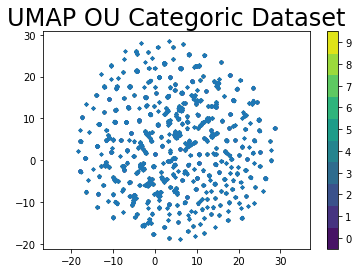

In [24]:
plt.scatter(embedding[:, 0], embedding[:, 1], cmap='Spectral', s=5)
plt.gca().set_aspect('equal', 'datalim')
plt.colorbar(boundaries=np.arange(11)-0.5).set_ticks(np.arange(10))
plt.savefig('UMAP_cat.png', bbox_inches='tight')
plt.title('UMAP OU Categoric Dataset', fontsize=24);